In [1]:
# utilizado quando da criação do notebook, para recarregar os arquivos externos automaticamente

%load_ext autoreload
%autoreload 2

# Importando módulos e arquivo de dados

In [2]:
import input_data as inpdt  # arquivo de funções criadas para tratar os dados
import plots  # arquivo de funções criadas para pltar os dados 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_path = "dados_brutos/notas_2019_nivel1_limpo.csv"

In [4]:
df = inpdt.input_data(file_path)
df.head()

,ALUNO,TURMA,Acertos parte A,Q17,Q18
0,hVXnK1xq,FM131,13.0,8.0,7.1
1,IYnzA3Os,TM122,12.0,8.0,7.1
2,fl9124XE,MAM231,11.0,10.0,8.7
3,g8XotMjL,TM122,12.0,7.0,6.1
4,eLazoRak,TM121,11.0,7.0,7.6


# Tratando os dados de entrada

## Removendo alunos faltosos

In [5]:
df_presentes = inpdt.no_absents(df)
df_presentes.head()

,ALUNO,TURMA,Acertos parte A,Q17,Q18
0,hVXnK1xq,FM131,13.0,8.0,7.1
1,IYnzA3Os,TM122,12.0,8.0,7.1
2,fl9124XE,MAM231,11.0,10.0,8.7
3,g8XotMjL,TM122,12.0,7.0,6.1
4,eLazoRak,TM121,11.0,7.0,7.6


In [6]:
df_presentes.describe()

,Acertos parte A,Q17,Q18
count,35.000000,35.000000,35.000000
mean,8.057143,5.485714,2.985714
std,2.436763,2.974118,3.277027
min,3.000000,0.000000,0.000000
25%,6.000000,3.000000,0.000000
50%,7.000000,6.000000,1.100000
75%,10.000000,7.500000,6.100000
max,13.000000,10.000000,8.700000


## Calculando as notas, organizando e describe

In [7]:
df_pontos = inpdt.grades(df_presentes)
df_pontos.head()

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
0,hVXnK1xq,FM131,13.0,8.0,7.1,65.0,15.1,80.1
1,IYnzA3Os,TM122,12.0,8.0,7.1,60.0,15.1,75.1
2,fl9124XE,MAM231,11.0,10.0,8.7,55.0,18.7,73.7
3,g8XotMjL,TM122,12.0,7.0,6.1,60.0,13.1,73.1
4,eLazoRak,TM121,11.0,7.0,7.6,55.0,14.6,69.6



**Aplicando o critério de desempate**


In [8]:
df_prem_nivel1 = inpdt.awards(df_pontos,35)
df_prem_nivel1.head()

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
1,hVXnK1xq,FM131,13.0,8.0,7.1,65.0,15.1,80.1
2,IYnzA3Os,TM122,12.0,8.0,7.1,60.0,15.1,75.1
3,fl9124XE,MAM231,11.0,10.0,8.7,55.0,18.7,73.7
4,g8XotMjL,TM122,12.0,7.0,6.1,60.0,13.1,73.1
5,eLazoRak,TM121,11.0,7.0,7.6,55.0,14.6,69.6


**Exportando os dados do nível 1 para posterior comparação com os demais níveis**

In [9]:
df_prem_nivel1.to_csv('nivel1python.csv')


**Vendo a nota de corte para entrar nas menções honrosas**


In [10]:
df_prem_nivel1['Pontuação final'].head(10).min()

61.5


**Verificar quantos alunos não zeraram a prova discursiva**


In [11]:
# alunos que não zeraram a prova discursiva. Comparar com ano passado.

df_prem_nivel1['ALUNO'][df_prem_nivel1['Pontos - Discursiva'] != 0].count()

32

**Describe**

In [12]:
df_prem_nivel1.describe()

,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,8.057143,5.485714,2.985714,40.285714,8.471429,48.757143
std,2.436763,2.974118,3.277027,12.183816,5.406835,15.946294
min,3.000000,0.000000,0.000000,15.000000,0.000000,15.000000
25%,6.000000,3.000000,0.000000,30.000000,3.550000,37.000000
50%,7.000000,6.000000,1.100000,35.000000,9.000000,47.000000
75%,10.000000,7.500000,6.100000,50.000000,12.900000,61.900000
max,13.000000,10.000000,8.700000,65.000000,18.700000,80.100000


# Gráficos

## Histograma e boxplot

In [13]:
bins_nivel1 = inpdt.bins(df_prem_nivel1)
bins_nivel1

,Contagem,Contagem /%,Contagem cumulativa,Contagem /% cumulativa
Intervalos,,,,
"[0, 10)",0,0.00,0,0.00
"[10, 20)",1,2.86,1,2.86
"[20, 30)",1,2.86,2,5.72
"[30, 40)",12,34.29,14,40.01
"[40, 50)",6,17.14,20,57.15
"[50, 60)",5,14.29,25,71.44
"[60, 70)",6,17.14,31,88.58
"[70, 80)",3,8.57,34,97.15
"[80, 90)",1,2.86,35,100.01


In [14]:
inpdt.latex(bins_nivel1)

\begin{tabular}{lrrrr}
\toprule
{} &  Contagem &  Contagem /\% &  Contagem cumulativa &  Contagem /\% cumulativa \\
Intervalos &           &              &                      &                         \\
\midrule
[0, 10)    &         0 &         0.00 &                    0 &                    0.00 \\
[10, 20)   &         1 &         2.86 &                    1 &                    2.86 \\
[20, 30)   &         1 &         2.86 &                    2 &                    5.72 \\
[30, 40)   &        12 &        34.29 &                   14 &                   40.01 \\
[40, 50)   &         6 &        17.14 &                   20 &                   57.15 \\
[50, 60)   &         5 &        14.29 &                   25 &                   71.44 \\
[60, 70)   &         6 &        17.14 &                   31 &                   88.58 \\
[70, 80)   &         3 &         8.57 &                   34 &                   97.15 \\
[80, 90)   &         1 &         2.86 &                   35 &   

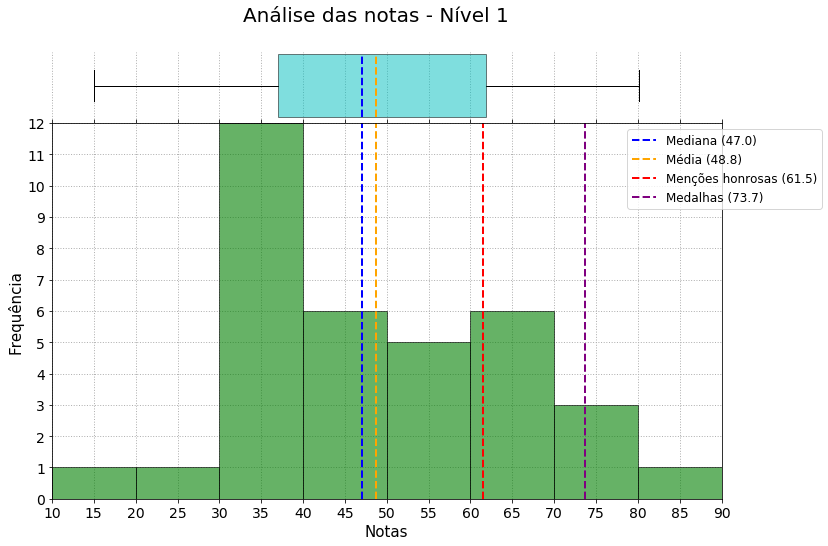

In [15]:
fig1, (ax2, ax1) = plt.subplots(figsize=(12, 8),
                                nrows=2,
                                sharex=True,
                                gridspec_kw={
                                    "height_ratios": (.15, .85),
                                    'hspace': 0.02
                                })

fig1.subplots_adjust(top=0.90)
fig1.suptitle('Análise das notas - Nível 1', fontsize=20)

plots.boxplot(df_prem_nivel1, 'Pontuação final', ax=ax2)
plots.histogram(df_prem_nivel1, 'Pontuação final', ax=ax1)

figname = 'images/hist_nivel1'
fig1.savefig(figname, bbox_inches='tight', dpi=300)

## Alunos por turma

In [16]:
turmas_nivel1 = inpdt.pivot_tables(df_prem_nivel1, 'ALUNO', 'TURMA', None)
turmas_nivel1

,ALUNO
TURMA,
AM231,1
BM131,6
FM131,2
MAM231,11
QM131,4
TM121,2
TM122,9
Total,35


In [17]:
turmas_nivel1.T

TURMA,AM231,BM131,FM131,MAM231,QM131,TM121,TM122,Total
ALUNO,1,6,2,11,4,2,9,35


In [18]:
inpdt.latex(turmas_nivel1.T)

\begin{tabular}{lrrrrrrrr}
\toprule
TURMA &  AM231 &  BM131 &  FM131 &  MAM231 &  QM131 &  TM121 &  TM122 &  Total \\
\midrule
ALUNO &      1 &      6 &      2 &      11 &      4 &      2 &      9 &     35 \\
\bottomrule
\end{tabular}



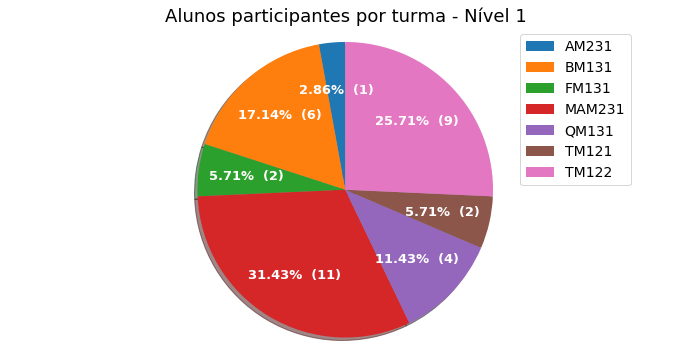

In [19]:
fig2, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(turmas_nivel1, 0)
labels = inpdt.pivot_index(turmas_nivel1)

plots.plot_pizza(values,
                 labels,
                 'Alunos participantes por turma - Nível 1',
                 ax=axarr)

figname = 'images/turmas_nivel1'
fig2.savefig(figname, bbox_inches='tight', dpi=300)

## Organizando a tabela de resumo estatístico

In [20]:
df_prem_nivel1.describe()

,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,8.057143,5.485714,2.985714,40.285714,8.471429,48.757143
std,2.436763,2.974118,3.277027,12.183816,5.406835,15.946294
min,3.000000,0.000000,0.000000,15.000000,0.000000,15.000000
25%,6.000000,3.000000,0.000000,30.000000,3.550000,37.000000
50%,7.000000,6.000000,1.100000,35.000000,9.000000,47.000000
75%,10.000000,7.500000,6.100000,50.000000,12.900000,61.900000
max,13.000000,10.000000,8.700000,65.000000,18.700000,80.100000


In [21]:
stats_nivel1 = inpdt.stats_table(df_prem_nivel1.describe())
stats_nivel1

,mean,std,min,25%,50%,75%,max,IQR
Pontos - Objetiva,40.29,12.18,15.0,30.00,35.0,50.0,65.0,20.00
Q17,5.49,2.97,0.0,3.00,6.0,7.5,10.0,4.50
Q18,2.99,3.28,0.0,0.00,1.1,6.1,8.7,6.10
Pontos - Discursiva,8.47,5.41,0.0,3.55,9.0,12.9,18.7,9.35
Pontuação final,48.76,15.95,15.0,37.00,47.0,61.9,80.1,24.90


In [22]:
inpdt.latex(stats_nivel1)

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   mean &    std &   min &    25\% &   50\% &   75\% &   max &    IQR \\
\midrule
Pontos - Objetiva   &  40.29 &  12.18 &  15.0 &  30.00 &  35.0 &  50.0 &  65.0 &  20.00 \\
Q17                 &   5.49 &   2.97 &   0.0 &   3.00 &   6.0 &   7.5 &  10.0 &   4.50 \\
Q18                 &   2.99 &   3.28 &   0.0 &   0.00 &   1.1 &   6.1 &   8.7 &   6.10 \\
Pontos - Discursiva &   8.47 &   5.41 &   0.0 &   3.55 &   9.0 &  12.9 &  18.7 &   9.35 \\
Pontuação final     &  48.76 &  15.95 &  15.0 &  37.00 &  47.0 &  61.9 &  80.1 &  24.90 \\
\bottomrule
\end{tabular}



## Análise de semestre e turno dos premiados

In [23]:
df_10_nivel1 = df_prem_nivel1.head(10)
df_10_nivel1

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
1,hVXnK1xq,FM131,13.0,8.0,7.1,65.0,15.1,80.1
2,IYnzA3Os,TM122,12.0,8.0,7.1,60.0,15.1,75.1
3,fl9124XE,MAM231,11.0,10.0,8.7,55.0,18.7,73.7
4,g8XotMjL,TM122,12.0,7.0,6.1,60.0,13.1,73.1
5,eLazoRak,TM121,11.0,7.0,7.6,55.0,14.6,69.6
6,DroOIkfi,TM122,10.0,10.0,6.1,50.0,16.1,66.1
7,LALf6IRG,QM131,10.0,6.0,8.7,50.0,14.7,64.7
8,i7hGhrAz,BM131,10.0,7.0,7.6,50.0,14.6,64.6
9,FgQuWCVY,TM122,10.0,7.0,5.3,50.0,12.3,62.3
10,HTdBjn55,TM122,10.0,6.0,5.5,50.0,11.5,61.5


In [25]:
df_10_nivel1 = inpdt.semester_shift(df_10_nivel1)
df_10_nivel1

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final,cod,num,Período,Turno
1,hVXnK1xq,FM131,13.0,8.0,7.1,65.0,15.1,80.1,FM,131,3º período,Manhã
2,IYnzA3Os,TM122,12.0,8.0,7.1,60.0,15.1,75.1,TM,122,2º período,Manhã
3,fl9124XE,MAM231,11.0,10.0,8.7,55.0,18.7,73.7,MAM,231,3º período,Tarde
4,g8XotMjL,TM122,12.0,7.0,6.1,60.0,13.1,73.1,TM,122,2º período,Manhã
5,eLazoRak,TM121,11.0,7.0,7.6,55.0,14.6,69.6,TM,121,2º período,Manhã
6,DroOIkfi,TM122,10.0,10.0,6.1,50.0,16.1,66.1,TM,122,2º período,Manhã
7,LALf6IRG,QM131,10.0,6.0,8.7,50.0,14.7,64.7,QM,131,3º período,Manhã
8,i7hGhrAz,BM131,10.0,7.0,7.6,50.0,14.6,64.6,BM,131,3º período,Manhã
9,FgQuWCVY,TM122,10.0,7.0,5.3,50.0,12.3,62.3,TM,122,2º período,Manhã
10,HTdBjn55,TM122,10.0,6.0,5.5,50.0,11.5,61.5,TM,122,2º período,Manhã


In [26]:
per_10_nivel1 = inpdt.pivot_tables(df_10_nivel1, 'ALUNO', 'Período', None)
per_10_nivel1

,ALUNO
Período,
2º período,6
3º período,4
Total,10


In [27]:
inpdt.latex(per_10_nivel1)

\begin{tabular}{lr}
\toprule
{} &  ALUNO \\
Período    &        \\
\midrule
2º período &      6 \\
3º período &      4 \\
Total      &     10 \\
\bottomrule
\end{tabular}



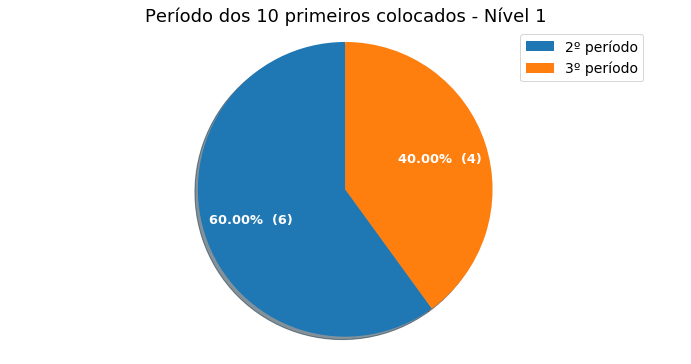

In [28]:
fig3, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(per_10_nivel1, 0)
labels = inpdt.pivot_index(per_10_nivel1)

plots.plot_pizza(values,
                 labels,
                 'Período dos 10 primeiros colocados - Nível 1',
                 ax=axarr)

figname = 'images/per_10_nivel1'
fig3.savefig(figname, bbox_inches='tight', dpi=300)

In [29]:
curso_10_nivel1 = inpdt.pivot_tables(df_10_nivel1, 'ALUNO', 'cod', None)
curso_10_nivel1

,ALUNO
cod,
BM,1
FM,1
MAM,1
QM,1
TM,6
Total,10


In [30]:
inpdt.latex(curso_10_nivel1)

\begin{tabular}{lr}
\toprule
{} &  ALUNO \\
cod   &        \\
\midrule
BM    &      1 \\
FM    &      1 \\
MAM   &      1 \\
QM    &      1 \\
TM    &      6 \\
Total &     10 \\
\bottomrule
\end{tabular}



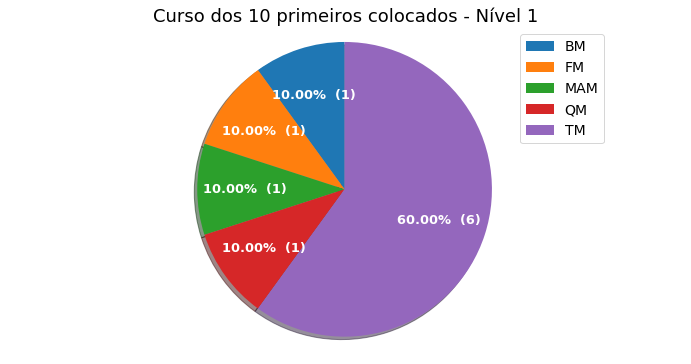

In [31]:
fig4, axarr = plt.subplots(nrows=1, ncols=1, figsize=(12,6), facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(curso_10_nivel1, 0)
labels = inpdt.pivot_index(curso_10_nivel1)

plots.plot_pizza(values, labels, 'Curso dos 10 primeiros colocados - Nível 1', ax=axarr)

figname = 'images/curso_10_nivel1'
fig4.savefig(figname, bbox_inches='tight', dpi=300)